Types of Layer:
- Convolution
- Pooling
- Flatten
- Dropout

# 1. Outline the problem

Image classification using the CIFAR10 dataset

In [1]:
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) = (
                    keras.datasets.cifar10.load_data())

In [2]:
train_images.shape

(50000, 32, 32, 3)

In [3]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

# 2. Identify inputs and outputs

In [4]:
train_images.shape

(5000, 32, 32, 3)

## Number of features CIFAR-10
How many features does one image in the CIFAR-10 dataset have?

* A. 32
* B. 1024
* C. 3072
* D. 5000

In [5]:
train_images.min(), train_images.max()

(0, 255)

In [6]:
train_labels.shape

(5000, 1)

In [7]:
train_labels.min(), train_labels.max()

(0, 9)

# 3. Prepare the data

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

# Number of parameters
Suppose we create a single Dense (fully connected) layer with 100 hidden units that connect to the input pixels, how many parameters does this layer have?

A. 307200

B. 307300

C. 100

D. 3072

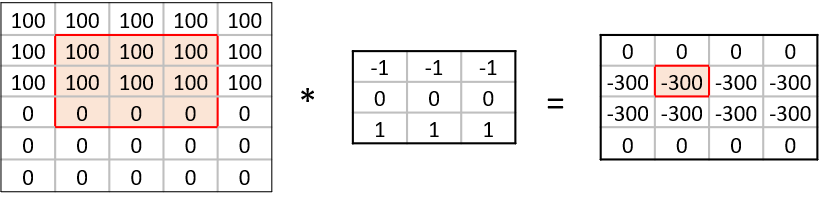

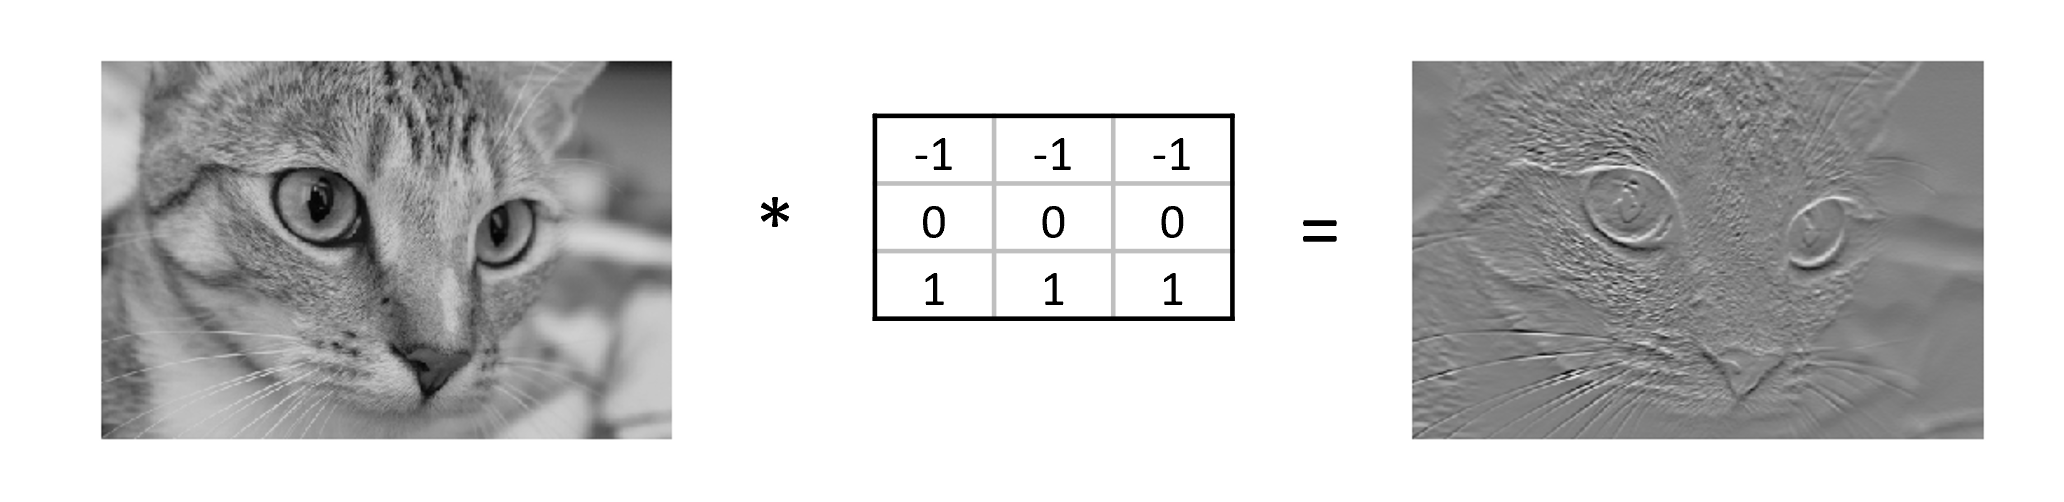

# Number of model parameters

Suppose we apply a convolutional layer with 100 kernels of size 3 * 3 * 3 (the last dimension applies to the rgb channels) to our images of 32 * 32 * 3 pixels. How many parameters do we have? Assume, for simplicity, that the kernels do not use bias terms. Compare this to the answer of the previous exercise

A: 2700

In [9]:
train_images.shape

(5000, 32, 32, 3)

In [10]:
train_images.shape[1:]

(32, 32, 3)

## 4. Choose a pretrained model or start building architecture from scratch


* What do you think is the function of the `Flatten` layer?
* Which layer has the most parameters? Do you find this intuitive?
* (optional) Pick a model from https://paperswithcode.com/sota/image-classification-on-cifar-10 . Try to understand how it works.


In [11]:
# create our model
inputs = keras.Input(shape = train_images.shape[1:])

x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs,
                    name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 flatten (Flatten)           (None, 39200)             0         
                                                                 
 dense (Dense)               (None, 10)                392010    
                                                                 
Total params: 415960 (1.59 MB)
Trainable params: 415960 (1.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
def create_nn():
    # create our model
    inputs = keras.Input(shape = train_images.shape[1:])

    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)     # new layer
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)     # new layer
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs=inputs, outputs=outputs,
                        name="cifar_model_small")
    return model
model = create_nn()
model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 50)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1800)        

## 5. Choose a loss function and optimizer

In [13]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])
compile_model(model)

## 6. Train the model

In [14]:
?model.fit # or shift+tab when standing inside the function

Object `model.fit # or shift+tab when standing inside the function` not found.


In [15]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 13s 74ms/step - loss: 2.0418 - accuracy: 0.2556 - val_loss: 1.8532 - val_accuracy: 0.2960
Epoch 2/10
157/157 [==============================] - 12s 75ms/step - loss: 1.6524 - accuracy: 0.4022 - val_loss: 1.5903 - val_accuracy: 0.4208
Epoch 3/10
157/157 [==============================] - 10s 64ms/step - loss: 1.4883 - accuracy: 0.4662 - val_loss: 1.5591 - val_accuracy: 0.4503
Epoch 4/10
157/157 [==============================] - 10s 65ms/step - loss: 1.3645 - accuracy: 0.5180 - val_loss: 1.4009 - val_accuracy: 0.4956
Epoch 5/10
157/157 [==============================] - 9s 60ms/step - loss: 1.2844 - accuracy: 0.5432 - val_loss: 1.4051 - val_accuracy: 0.4964
Epoch 6/10
157/157 [==============================] - 9s 60ms/step - loss: 1.1877 - accuracy: 0.5794 - val_loss: 1.3272 - val_accuracy: 0.5303
Epoch 7/10
157/157 [==============================] - 10s 63ms/step - loss: 1.1109 - accuracy: 0.6160 - val_loss: 1.3239 - val_accuracy: 0

## 8. Measure performance

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

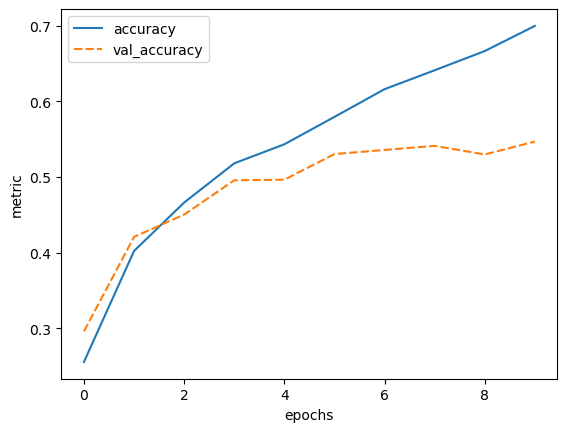

In [17]:
def plot_history(history, metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")
plot_history(history, ['accuracy', 'val_accuracy'])

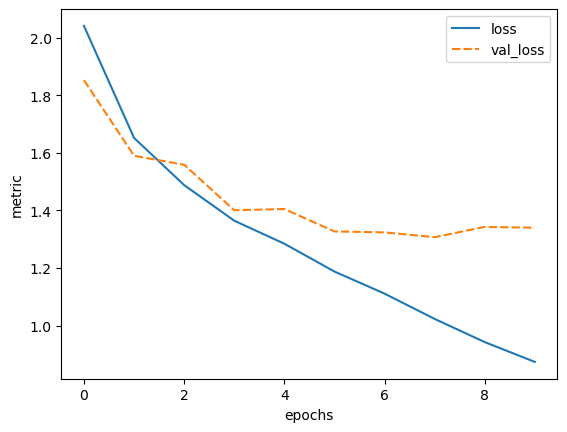

In [18]:
plot_history(history, ['loss', 'val_loss'])

## Network depth (in breakout rooms)
What, do you think, will be the effect of adding a convolutional layer to your model? Will this model have more or fewer parameters?
Try it out. Create a `model` that has an additional `Conv2d` layer with 50 filters after the last MaxPooling2D layer. Train it for 20 epochs and plot the results.

**HINT**:
The model definition that we used previously needs to be adjusted as follows:
```python
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
# Add your extra layer here
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)
```

In [19]:
def create_nn_extra_layer():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x) #
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x) # estra layer
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
    return model

model = create_nn_extra_layer()

In [20]:
model.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 50)          

In [21]:
compile_model(model)
history = model.fit(train_images, train_labels, epochs=20,
                   validation_data=(test_images, test_labels))


Epoch 1/20
157/157 [==============================] - 12s 71ms/step - loss: 2.1312 - accuracy: 0.2038 - val_loss: 1.8971 - val_accuracy: 0.3005
Epoch 2/20
157/157 [==============================] - 12s 74ms/step - loss: 1.7966 - accuracy: 0.3580 - val_loss: 1.7196 - val_accuracy: 0.3700
Epoch 3/20
157/157 [==============================] - 12s 75ms/step - loss: 1.6339 - accuracy: 0.4032 - val_loss: 1.6243 - val_accuracy: 0.4033
Epoch 4/20
157/157 [==============================] - 14s 90ms/step - loss: 1.5074 - accuracy: 0.4678 - val_loss: 1.4953 - val_accuracy: 0.4510
Epoch 5/20
157/157 [==============================] - 16s 103ms/step - loss: 1.3908 - accuracy: 0.5062 - val_loss: 1.4145 - val_accuracy: 0.4859
Epoch 6/20
157/157 [==============================] - 14s 92ms/step - loss: 1.3144 - accuracy: 0.5332 - val_loss: 1.5568 - val_accuracy: 0.4496
Epoch 7/20
157/157 [==============================] - 14s 89ms/step - loss: 1.2533 - accuracy: 0.5640 - val_loss: 1.3937 - val_accuracy

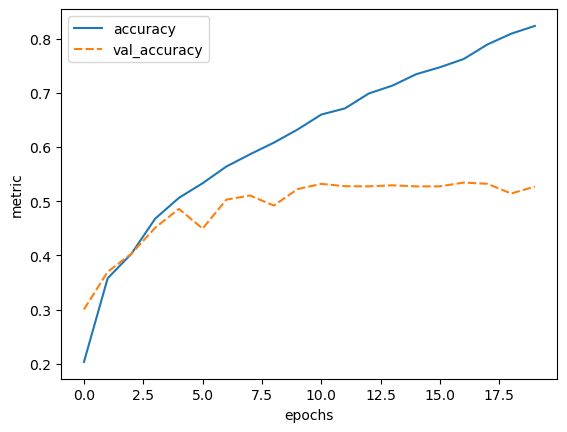

In [22]:
plot_history(history, ['accuracy', 'val_accuracy'])

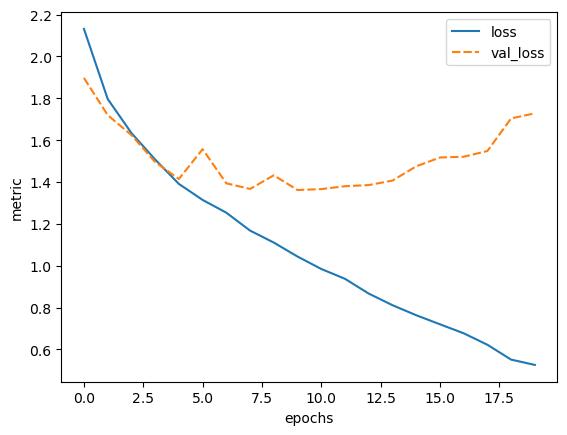

In [23]:
plot_history(history, ['loss', 'val_loss'])


## Why and when to use convolutional neural networks
1. Would it make sense to train a convolutional neural network (CNN) on the penguins dataset and why?
2. Would it make sense to train a CNN on the weather dataset and why?
3. (Optional) Can you think of a different machine learning task that would benefit from a CNN architecture?

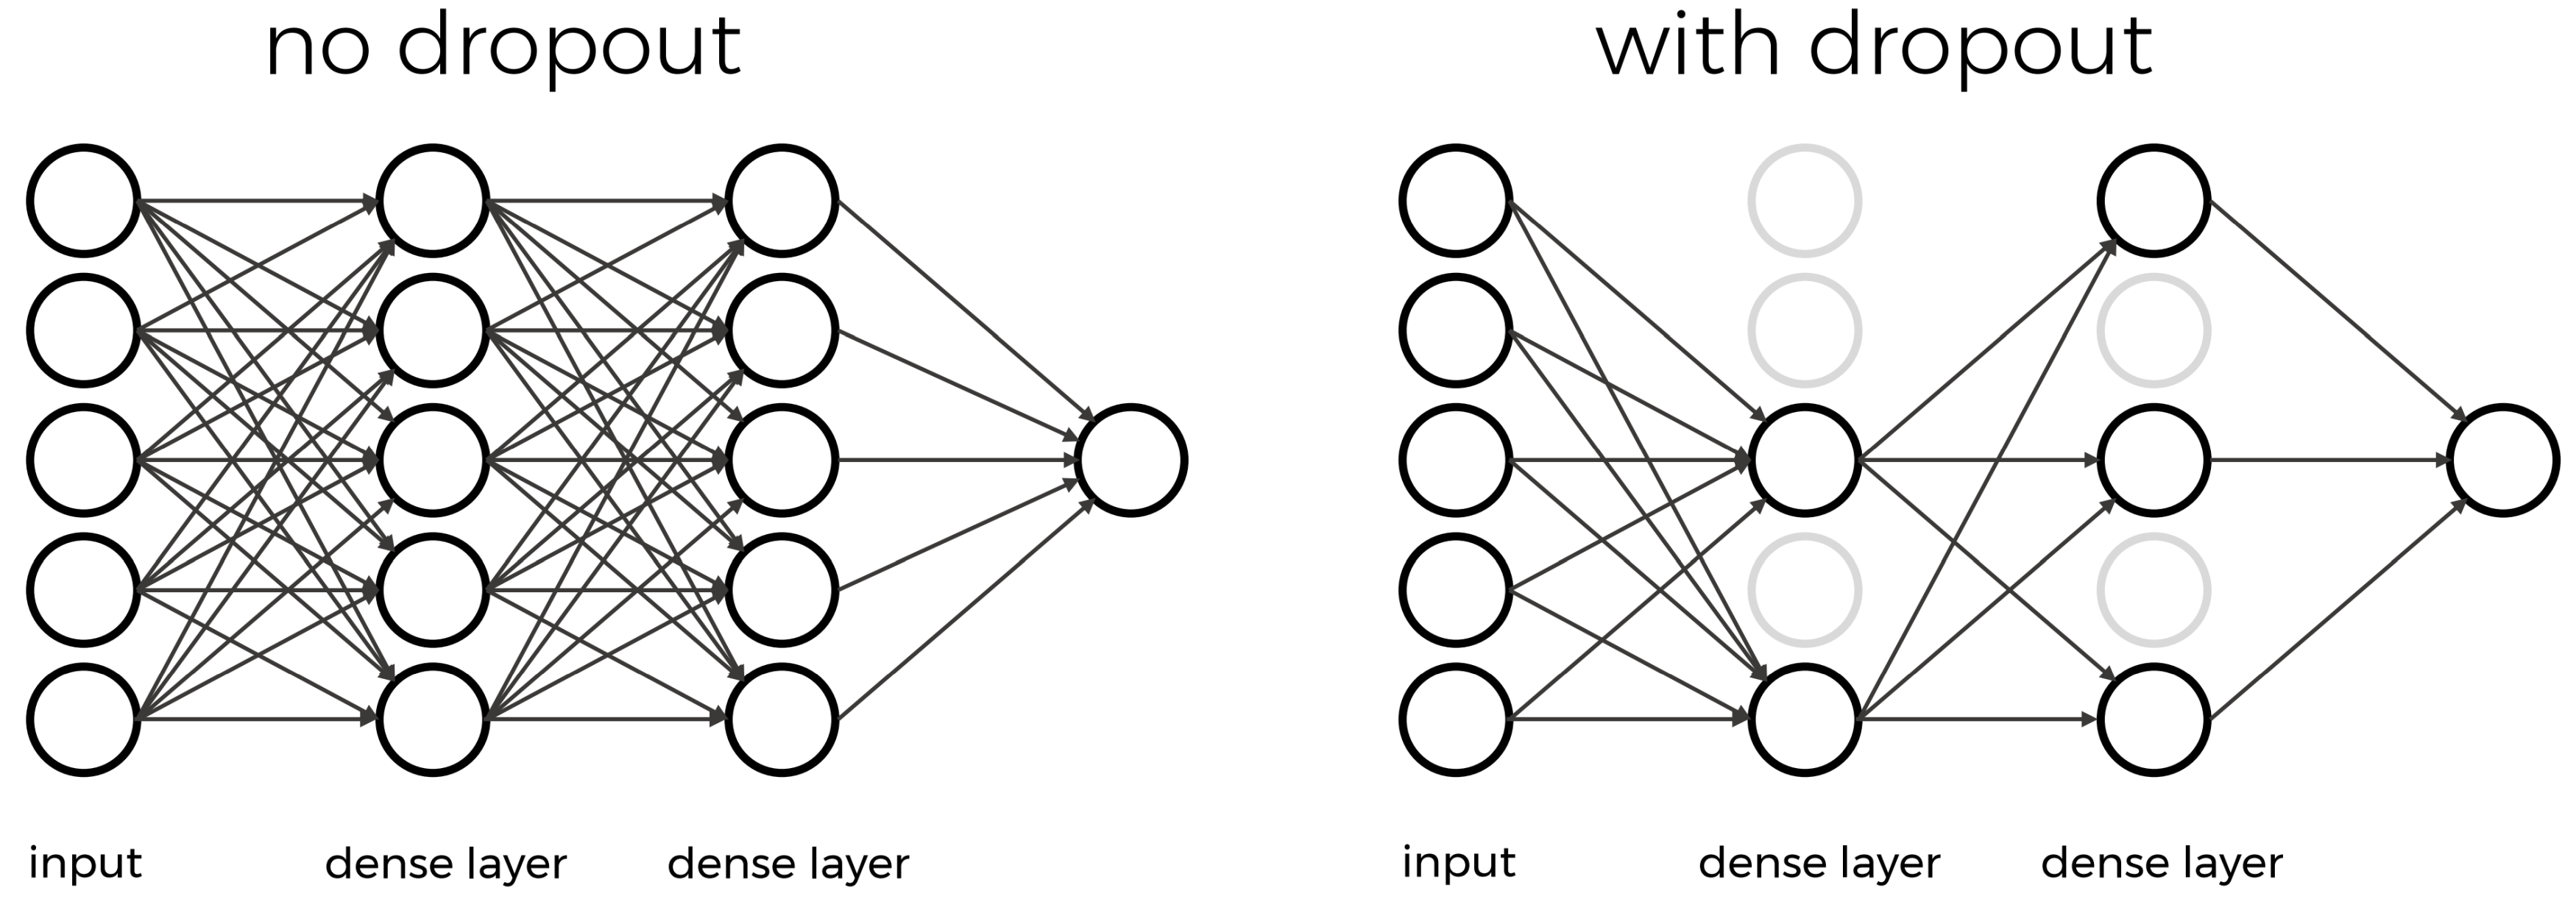

In [24]:
def create_nn_with_dropout():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x) #
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x) # estra layer
    #new layer
    x = keras.layers.Dropout(0.8)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
    return model

In [25]:
model_dropout = create_nn_with_dropout()
model_dropout.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 50)          

In [26]:
compile_model(model_dropout)

In [27]:
history = model_dropout.fit(train_images, train_labels, epochs=20, 
                            validation_data = (test_images, test_labels))

Epoch 1/20
157/157 [==============================] - 15s 91ms/step - loss: 2.1767 - accuracy: 0.1720 - val_loss: 2.0344 - val_accuracy: 0.2322
Epoch 2/20
157/157 [==============================] - 14s 89ms/step - loss: 2.0011 - accuracy: 0.2510 - val_loss: 1.8792 - val_accuracy: 0.3072
Epoch 3/20
157/157 [==============================] - 13s 82ms/step - loss: 1.8529 - accuracy: 0.2998 - val_loss: 1.8306 - val_accuracy: 0.3147
Epoch 4/20
157/157 [==============================] - 12s 77ms/step - loss: 1.7525 - accuracy: 0.3466 - val_loss: 1.6418 - val_accuracy: 0.3956
Epoch 5/20
157/157 [==============================] - 12s 79ms/step - loss: 1.6798 - accuracy: 0.3630 - val_loss: 1.6111 - val_accuracy: 0.3914
Epoch 6/20
157/157 [==============================] - 14s 88ms/step - loss: 1.6354 - accuracy: 0.3854 - val_loss: 1.5443 - val_accuracy: 0.4259
Epoch 7/20
157/157 [==============================] - 12s 80ms/step - loss: 1.5821 - accuracy: 0.4098 - val_loss: 1.5231 - val_accuracy:

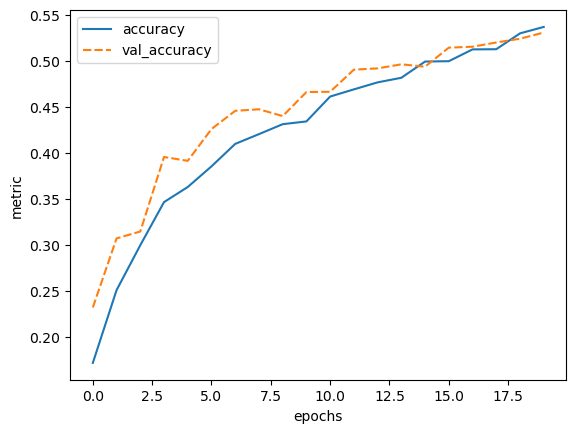

In [29]:
plot_history(history, ['accuracy', 'val_accuracy'])

In [30]:
test_loss, test_acc = model_dropout.evaluate(test_images, test_labels, verbose=2)

313/313 - 6s - loss: 1.2973 - accuracy: 0.5307 - 6s/epoch - 18ms/step


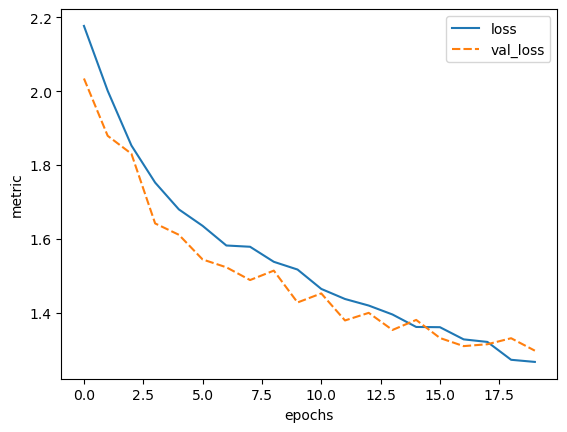

In [32]:
plot_history(history, ['loss', 'val_loss'])

## Vary dropout rate (in breakout rooms)
1. What do you think would happen if you lower the dropout rate? Try it out, and see how it affects the model training.
2. You are varying the dropout rate and checking its effect on the model performance, what is the term associated to this procedure?

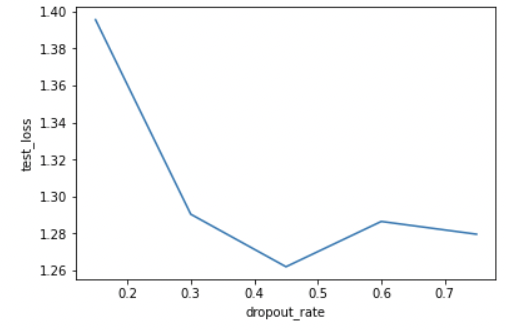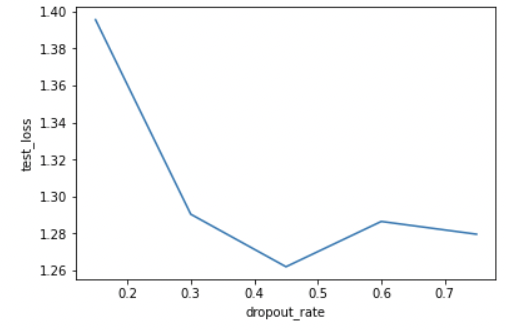

# 10. Share the Model

In [33]:
model.save('cnn_model')

INFO:tensorflow:Assets written to: cnn_model\assets


INFO:tensorflow:Assets written to: cnn_model\assets


## A real-world deep learning application (in breakout rooms)

1. Looking at the 'Model training' section of the notebook, what do you recognize from what you learned in this course?
2. Can you identify the different steps of the deep learning workflow in this notebook?
3. (Optional): Try to fully understand the neural network architecture from the first figure of [the paper](https://doi.org/10.1186/s13321-021-00558-4)